In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
#import missingno as msno
import warnings

# Study data files
application_train_path= "application_train.csv"
#application_test_path = "application_test.csv"

# Read the mouse data and the study results
Train_data = pd.read_csv(application_train_path)
#Test_data = pd.read_csv(application_test_path)


In [3]:
# Display the data table for preview
Train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Display summary statistics for numerical columns
summary_stats_numeric = Train_data.describe()

# Display summary statistics for categorical columns
summary_stats_categorical = Train_data.describe(include=['object'])

# Display summary statistics for all columns
summary_stats_all = Train_data.describe(include='all')

print("Summary Statistics for Numerical Columns:")
print(summary_stats_numeric)


Summary Statistics for Numerical Columns:
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000

In [7]:
print("\nSummary Statistics for Categorical Columns:")
print(summary_stats_categorical)



Summary Statistics for Categorical Columns:
       NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartm

In [10]:
#print("\nSummary Statistics for All Columns:")
#print(summary_stats_all)

In [9]:
unique_sk_Id_count = Train_data['SK_ID_CURR'].nunique()
print("Number of unique Ids:", unique_sk_Id_count)

Number of unique Ids: 307511


Examine the Categorical Features

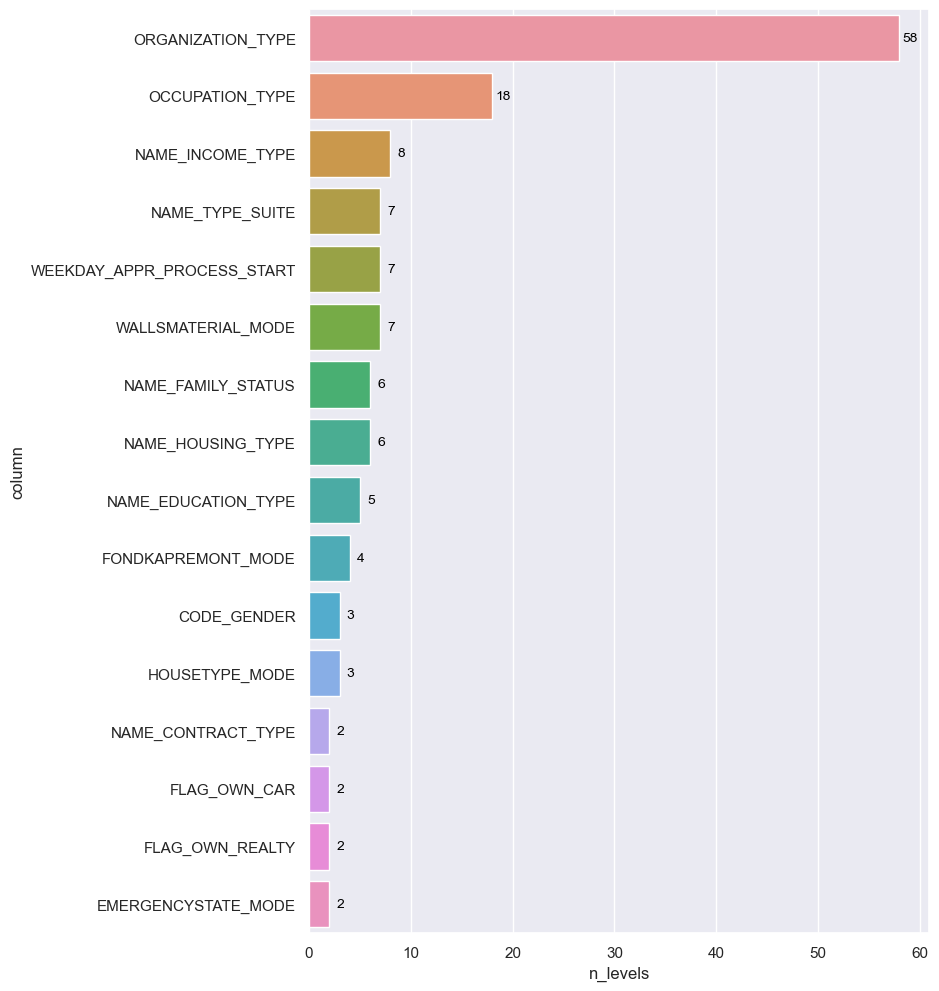

In [11]:
# Filter columns with object data type and count the number of unique levels
object_columns = Train_data.select_dtypes(include=['object'])
n_levels = object_columns.nunique()

# Creating a DataFrame with column names and their respective number of levels
data_to_plot = pd.DataFrame({'column': n_levels.index, 'n_levels': n_levels.values})

# Sorting the DataFrame by the number of levels in descending order
data_to_plot = data_to_plot.sort_values("n_levels", ascending=False)

# Setting the figure size
sns.set(rc={"figure.figsize": (8, 12)})

# Creating the bar plot
ax = sns.barplot(data=data_to_plot, x="n_levels", y="column")

# Annotating the bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black', xytext=(8, 0),
                textcoords='offset points')

plt.show()

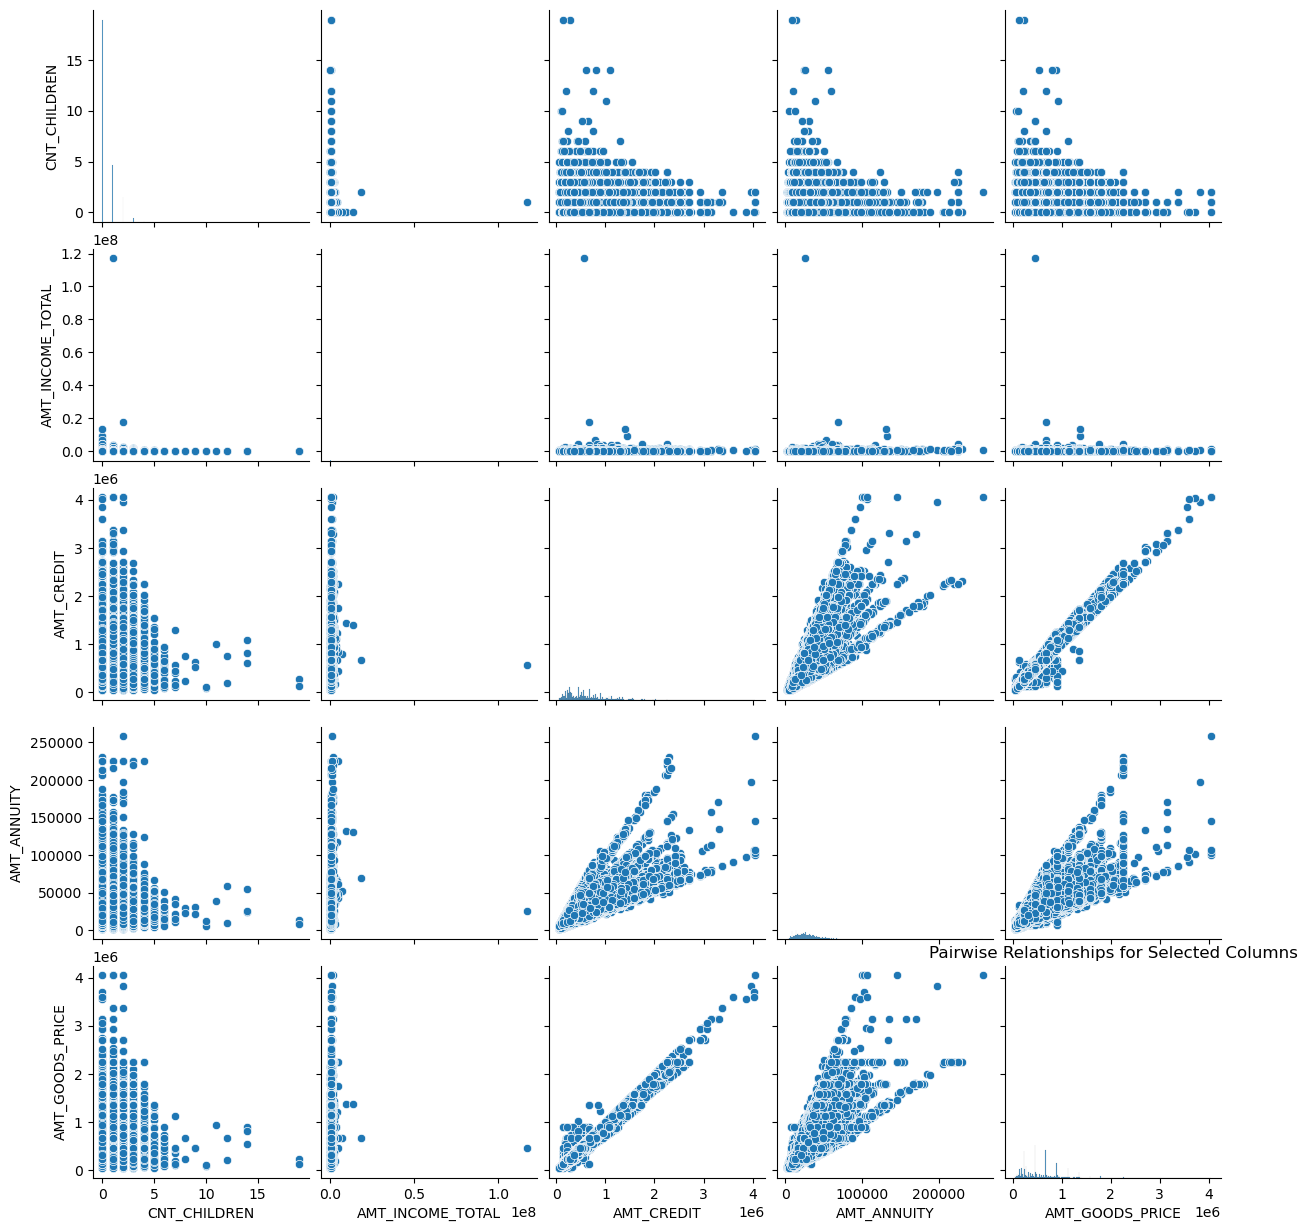

In [16]:
# Pairplot shows pairwise relationships and distributions for the selected data from the dataset
# Select the columns to include in the pairwise plots
selected_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_EDUCATION_TYPE',
                     'OCCUPATION_TYPE', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE']  

# Subset the DataFrame to include only the selected columns
selected_df = Train_data[selected_columns]

# Generate pairwise plots for the selected columns
sns.pairplot(selected_df)
plt.title('Pairwise Relationships for Selected Columns')
plt.show()

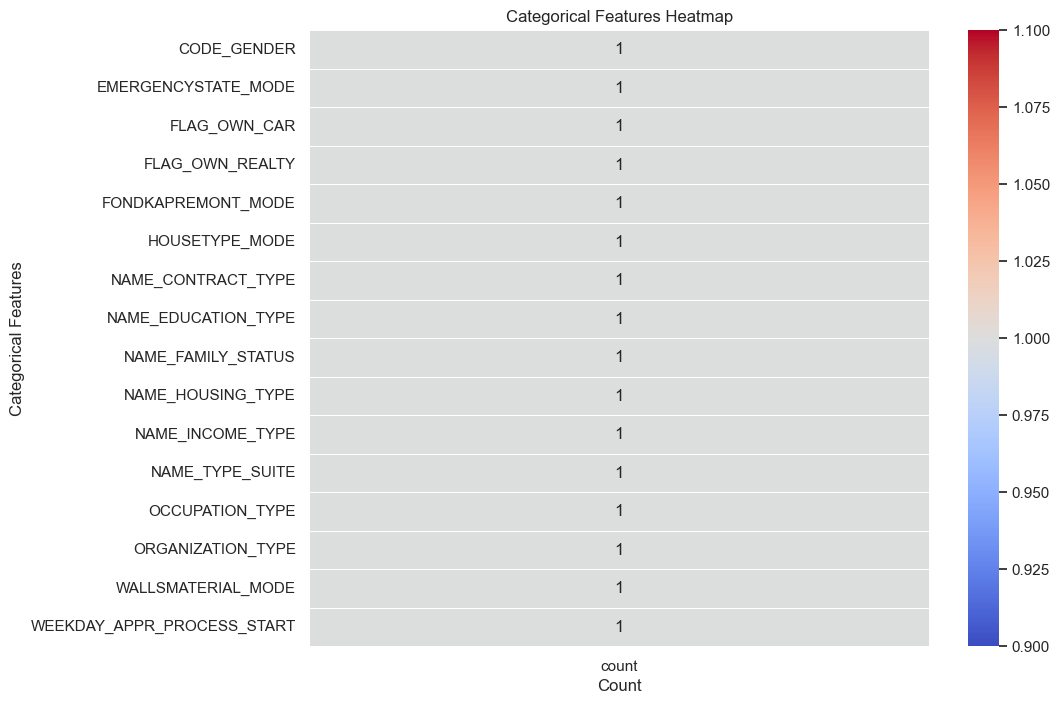

In [67]:
categorical_data = Train_data.select_dtypes(include=['object'])

# Calculate the cross-tabulation of categorical variables
cross_tab = pd.crosstab(index=categorical_data.columns, columns='count')

# Create the clustered heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5)
plt.title('Categorical Features Heatmap')
plt.xlabel('Count')
plt.ylabel('Categorical Features')
plt.show()

C:\Users\audre\AppData\Local\Temp\ipykernel_29684\553848106.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_selected_numerical = selected_numerical_data.corr()


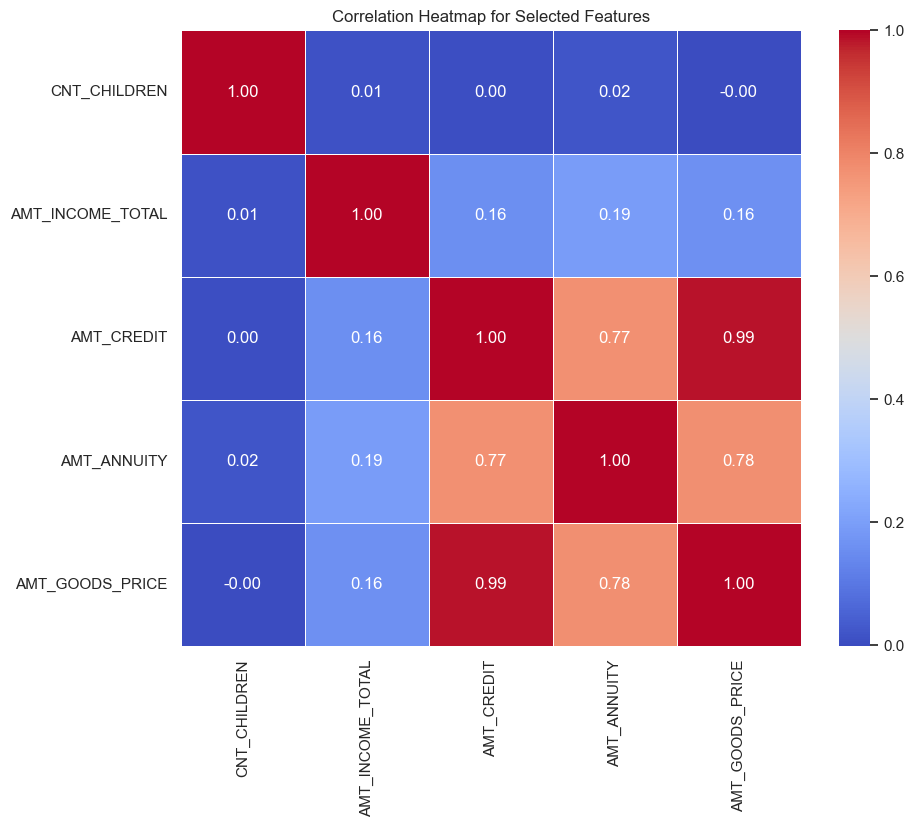

In [70]:
# Select specific numerical columns for the heatmap
selected_numerical_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_EDUCATION_TYPE',
                     'OCCUPATION_TYPE', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE'] 

# Extract the selected numerical features from the dataset
selected_numerical_data = Train_data[selected_numerical_columns]

# Calculate the correlation matrix for the selected numerical features
corr_selected_numerical = selected_numerical_data.corr()

# Create a heatmap of the correlation matrix for the selected numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(corr_selected_numerical, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Selected Features')
plt.show()

C:\Users\audre\AppData\Local\Temp\ipykernel_29684\4170596088.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_df.corr()


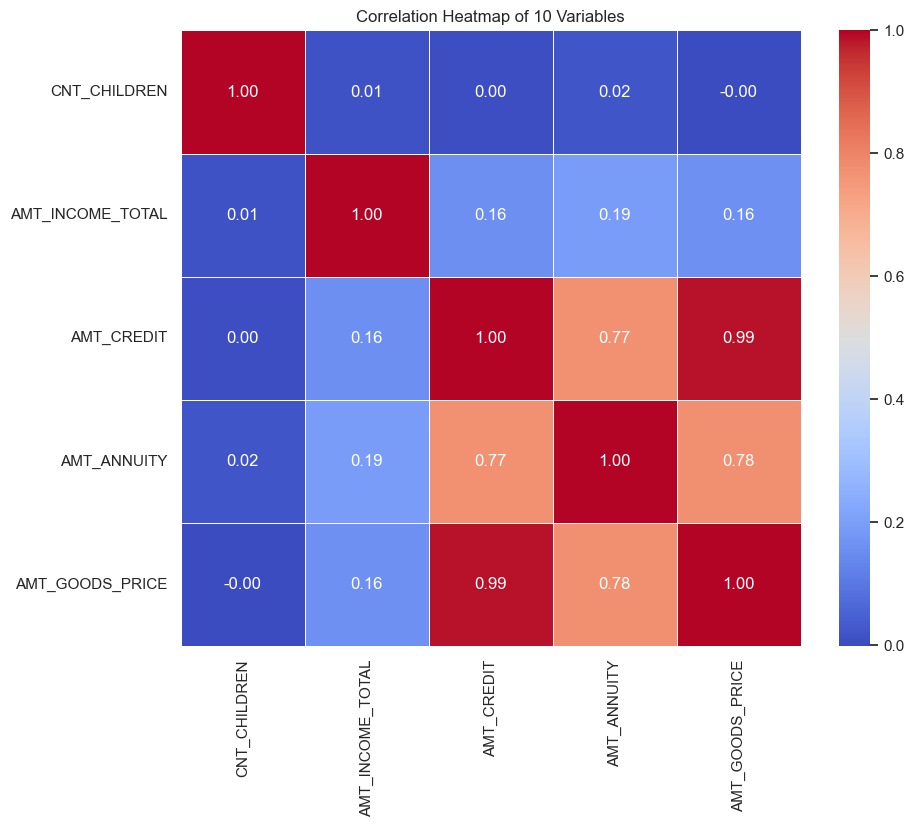

In [71]:
# Select the 10 variables for which you want to compute the correlation
selected_variables = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_EDUCATION_TYPE',
                     'OCCUPATION_TYPE', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE'] 

# Subset the DataFrame to include only the selected variables
selected_df = Train_data[selected_variables]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of 10 Variables')
plt.show()

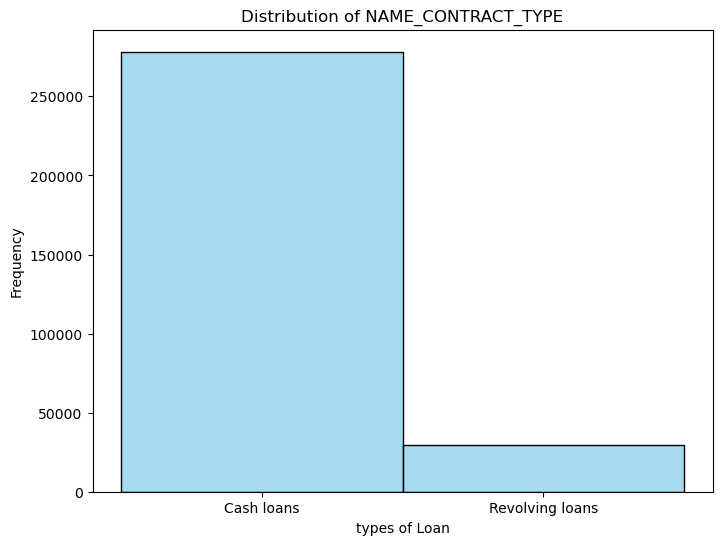

In [7]:
#Distribution of a specific column
plt.figure(figsize=(8, 6))
sns.histplot(Train_data['NAME_CONTRACT_TYPE'], bins=2, color='skyblue')
plt.title('Distribution of NAME_CONTRACT_TYPE')
plt.xlabel('types of Loan')
plt.ylabel('Frequency')
plt.show()

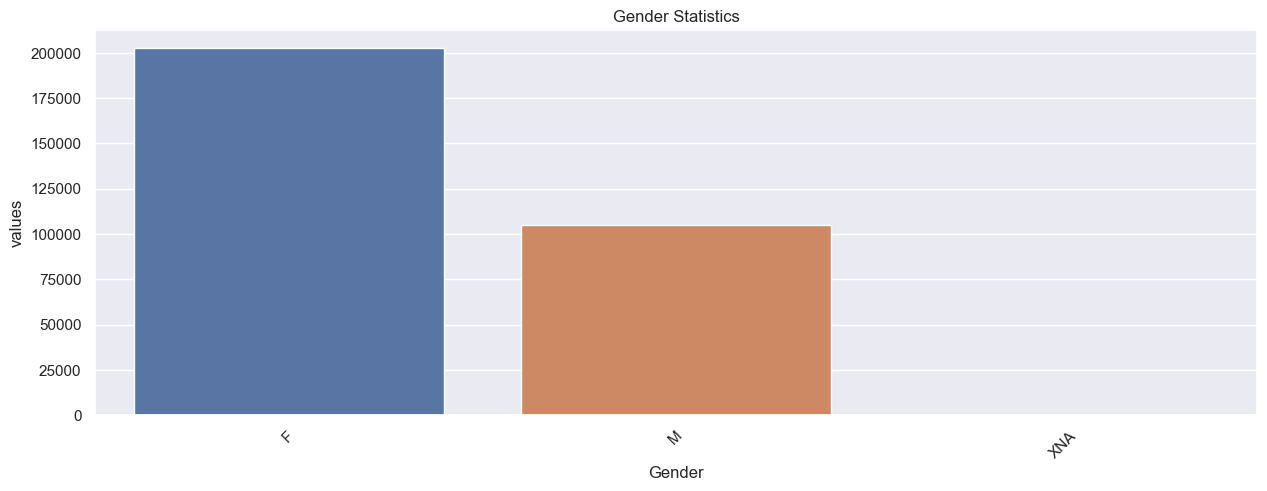

In [14]:
temp = Train_data["CODE_GENDER"].value_counts()
Gender_Stats = pd.DataFrame({'Gender': temp.index, 'values': temp.values})
plt.figure(figsize = (15,5))
plt.title('Gender Statistics')
sns.barplot(x = 'Gender', y="values", data=Gender_Stats)
plt.xticks(rotation=45) 
plt.show()

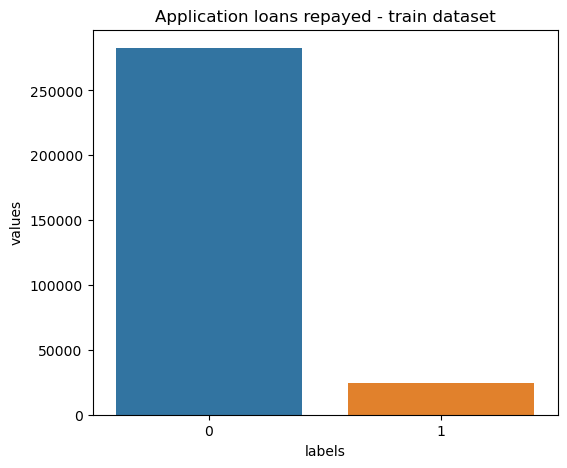

In [40]:
temp = Train_data["TARGET"].value_counts()
Target = pd.DataFrame({'labels': temp.index, 'values': temp.values})
plt.figure(figsize = (6,5))
plt.title('Application loans repayed - train dataset')
sns.barplot(x = 'labels', y="values", data=Target)
plt.show()

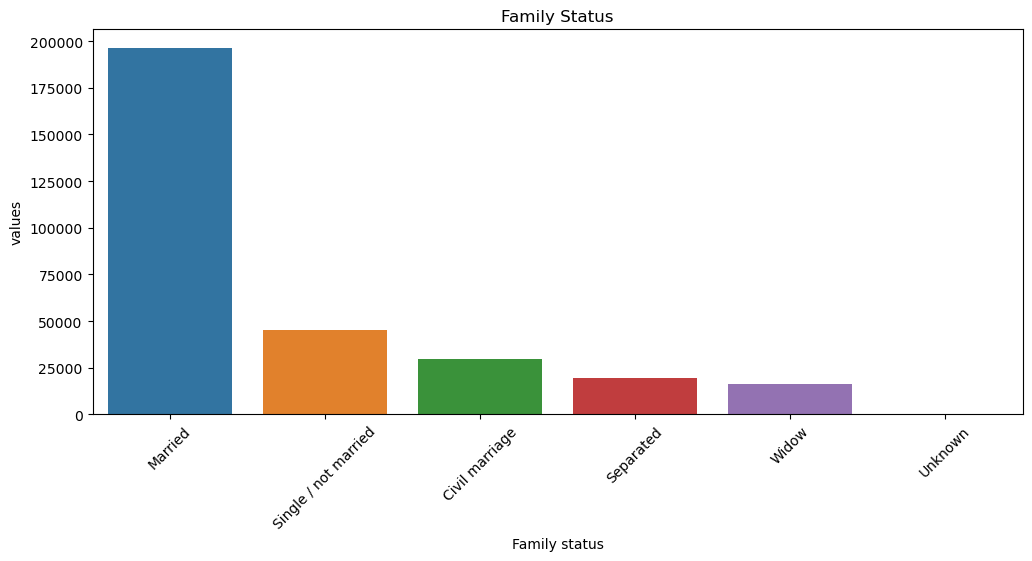

In [60]:
temp = Train_data["NAME_FAMILY_STATUS"].value_counts()
Fam_Stats = pd.DataFrame({'Family status': temp.index, 'values': temp.values})
plt.figure(figsize = (12,5))
plt.title('Family Status')
sns.barplot(x = 'Family status', y="values", data=Fam_Stats)
plt.xticks(rotation=45) 
plt.show()


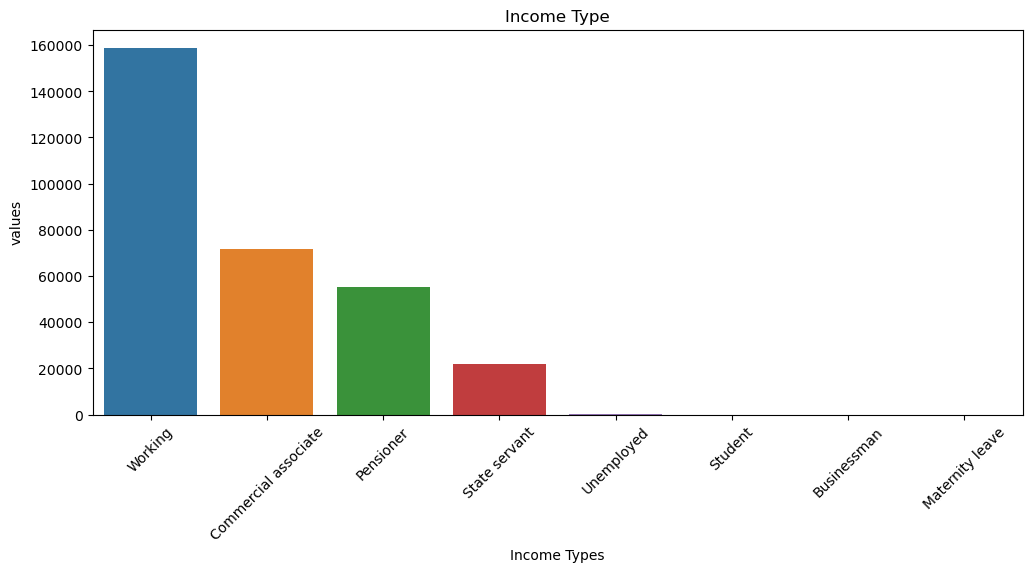

In [58]:
temp = Train_data["NAME_INCOME_TYPE"].value_counts()
Income_Stats = pd.DataFrame({'Income Types': temp.index, 'values': temp.values})
plt.figure(figsize = (12,5))
plt.title('Income Type')
sns.barplot(x = 'Income Types', y="values", data=Income_Stats)
plt.xticks(rotation=45) 
plt.show()

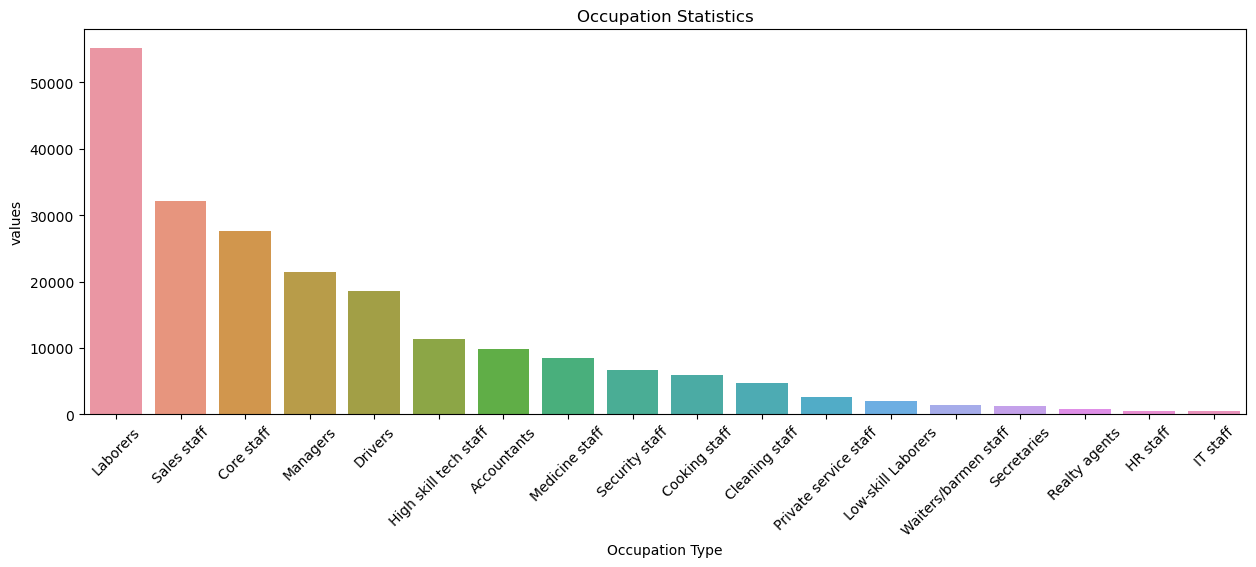

In [57]:
temp = Train_data["OCCUPATION_TYPE"].value_counts()
Occu_Stats = pd.DataFrame({'Occupation Type': temp.index, 'values': temp.values})
plt.figure(figsize = (15,5))
plt.title('Occupation Statistics')
sns.barplot(x = 'Occupation Type', y="values", data=Occu_Stats)
plt.xticks(rotation=45) 
plt.show()

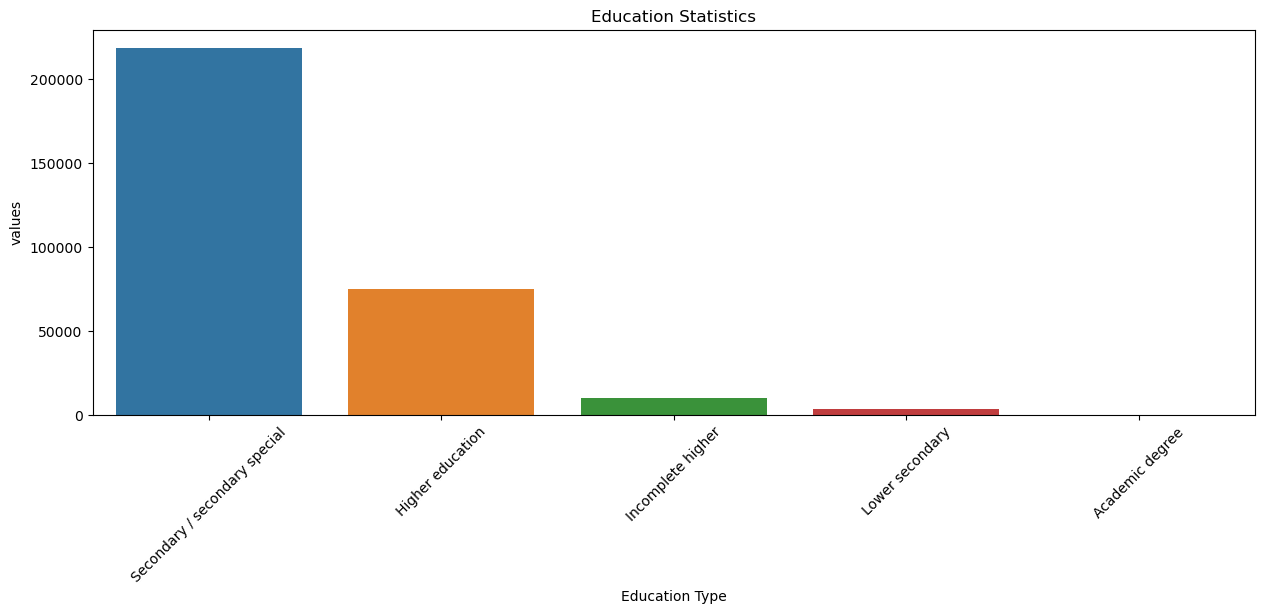

In [61]:
temp = Train_data["NAME_EDUCATION_TYPE"].value_counts()
Edu_Stats = pd.DataFrame({'Education Type': temp.index, 'values': temp.values})
plt.figure(figsize = (15,5))
plt.title('Education Statistics')
sns.barplot(x = 'Education Type', y="values", data=Edu_Stats)
plt.xticks(rotation=45) 
plt.show()


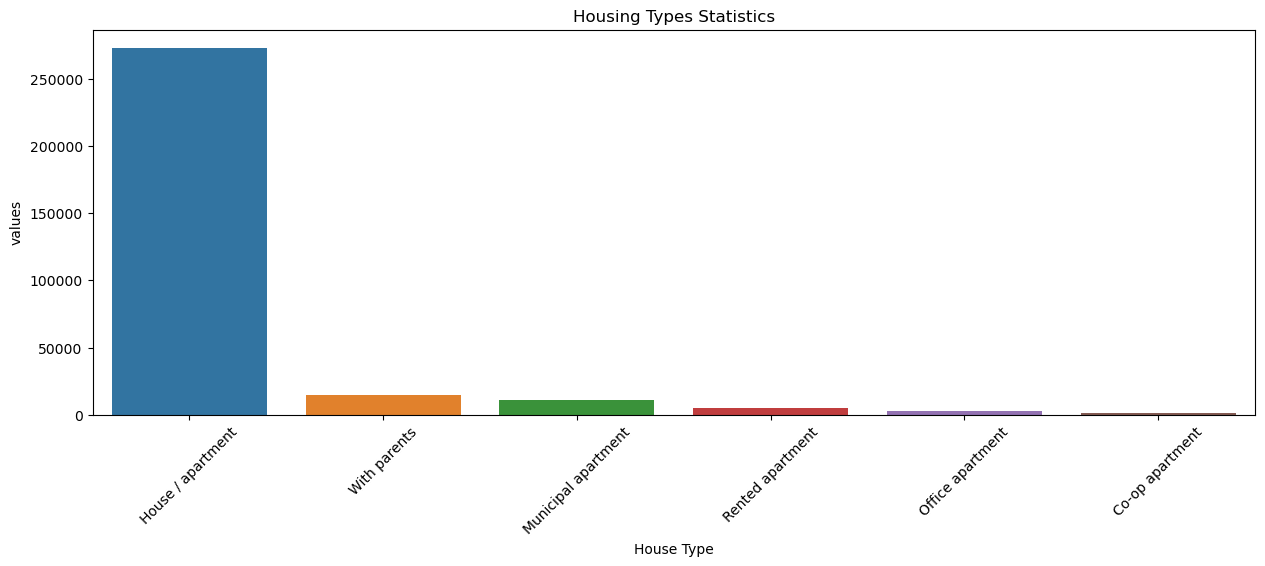

In [63]:
temp = Train_data["NAME_HOUSING_TYPE"].value_counts()
Housing_Stats = pd.DataFrame({'House Type': temp.index, 'values': temp.values})
plt.figure(figsize = (15,5))
plt.title('Housing Types Statistics')
sns.barplot(x = 'House Type', y="values", data=Housing_Stats)
plt.xticks(rotation=45) 
plt.show()

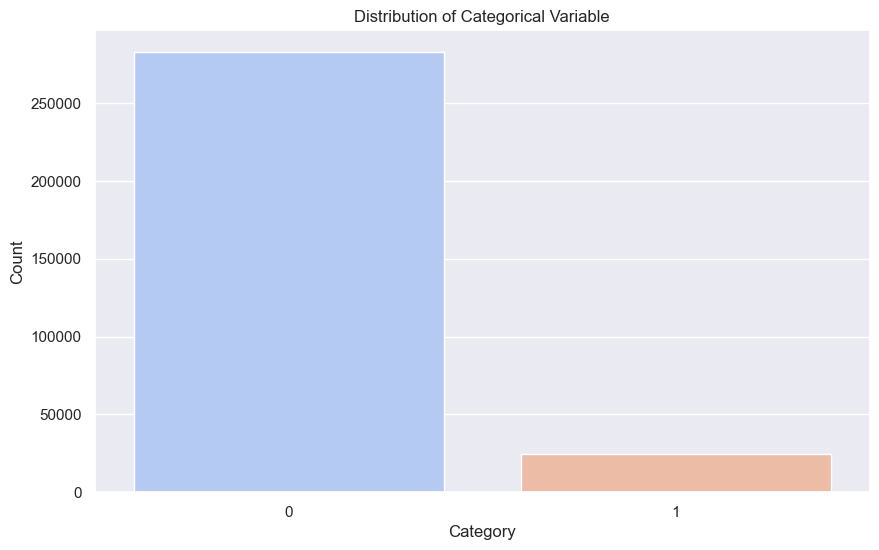

In [80]:
# Countplot to visualize the distribution of a categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(x='TARGET', data=Train_data, palette='coolwarm')
plt.title('Distribution of Categorical Variable')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

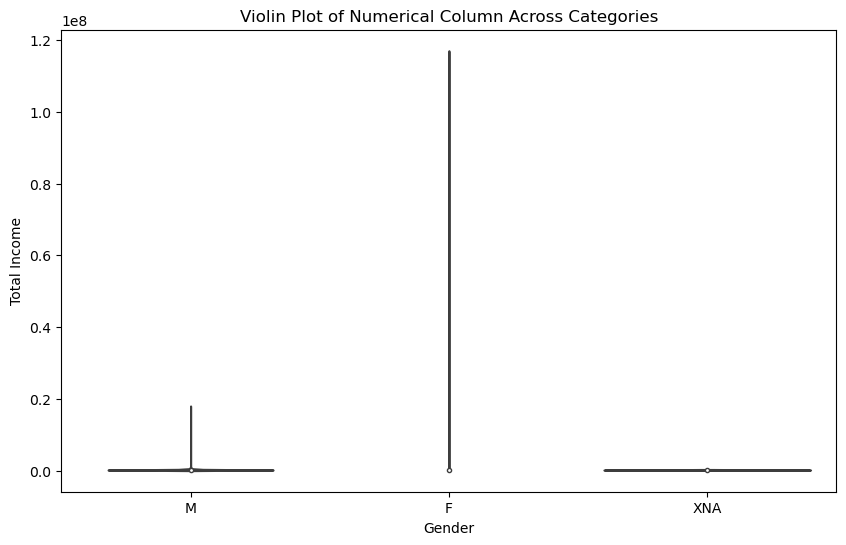

In [28]:
# Violin plot to compare the distribution of a numerical variable across different categories
plt.figure(figsize=(10, 6))
sns.violinplot(data=Train_data, x='CODE_GENDER', y='AMT_INCOME_TOTAL')
plt.title('Violin Plot of Numerical Column Across Categories')
plt.xlabel('Gender')
plt.ylabel('Total Income')
plt.show()

visualize the Numerical Features


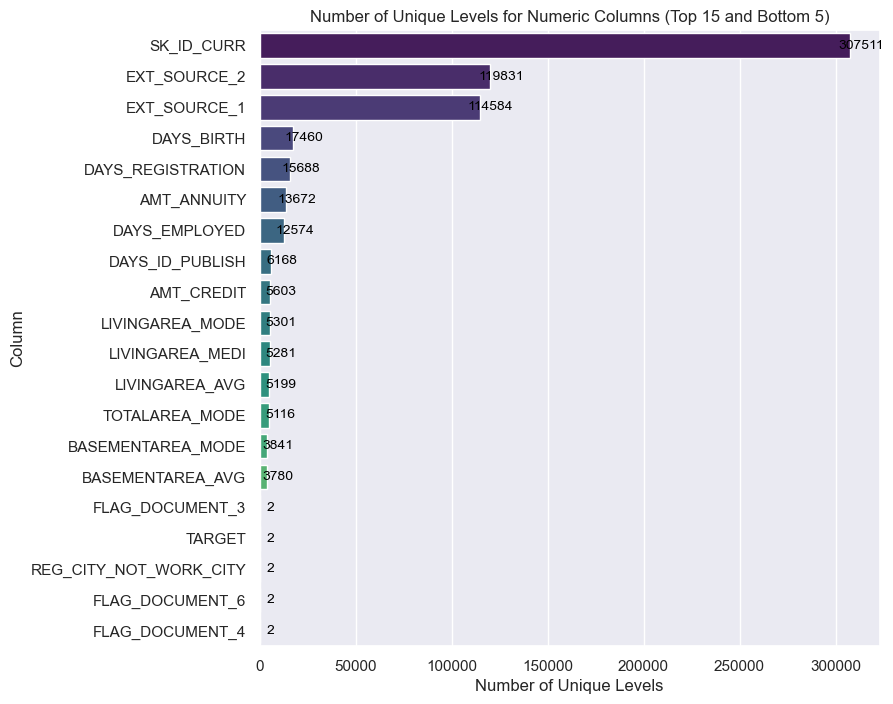

In [18]:
# Filter columns with numeric data type and count the number of unique levels
numeric_columns = Train_data.select_dtypes(include=['int64', 'float64'])
n_levels_numeric = numeric_columns.nunique()

# Creating a DataFrame with column names and their respective number of levels
data_to_plot_numeric = pd.DataFrame({'column': n_levels_numeric.index, 'n_levels': n_levels_numeric.values})

# Sorting the DataFrame by the number of levels in descending order
data_to_plot_numeric = data_to_plot_numeric.sort_values(by='n_levels', ascending=False)

# Limiting to the top 15 and bottom 5 columns
data_to_plot_numeric = pd.concat([data_to_plot_numeric.head(15), data_to_plot_numeric.tail(5)])

# Setting the figure size
sns.set(rc={"figure.figsize": (8, 8)})

# Creating the bar plot
ax = sns.barplot(data=data_to_plot_numeric, x="n_levels", y="column", palette="viridis")

# Annotating the bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black', xytext=(8, 0),
                textcoords='offset points')

plt.xlabel('Number of Unique Levels')
plt.ylabel('Column')
plt.title('Number of Unique Levels for Numeric Columns (Top 15 and Bottom 5)')
plt.show()

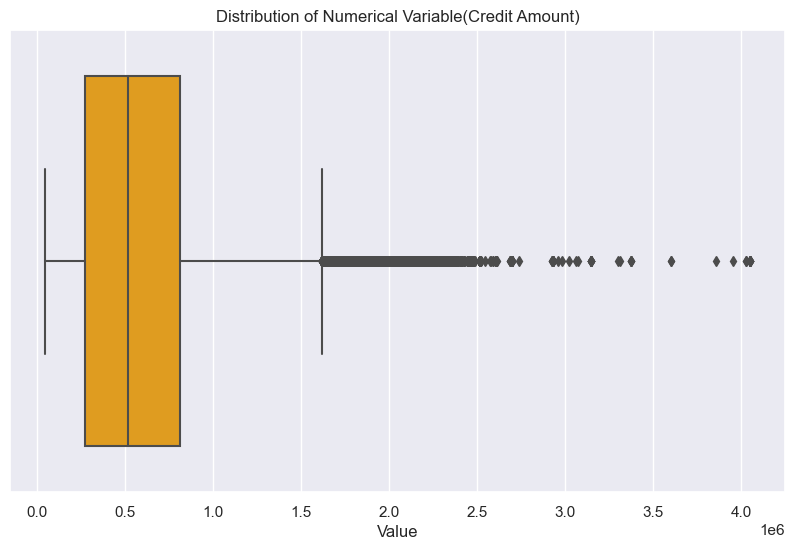

In [84]:
# Create a box plot to visualize the distribution of the numerical variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=Train_data['AMT_CREDIT'], color='orange')
plt.title('Distribution of Numerical Variable(Credit Amount)')
plt.xlabel('Value')
plt.show()

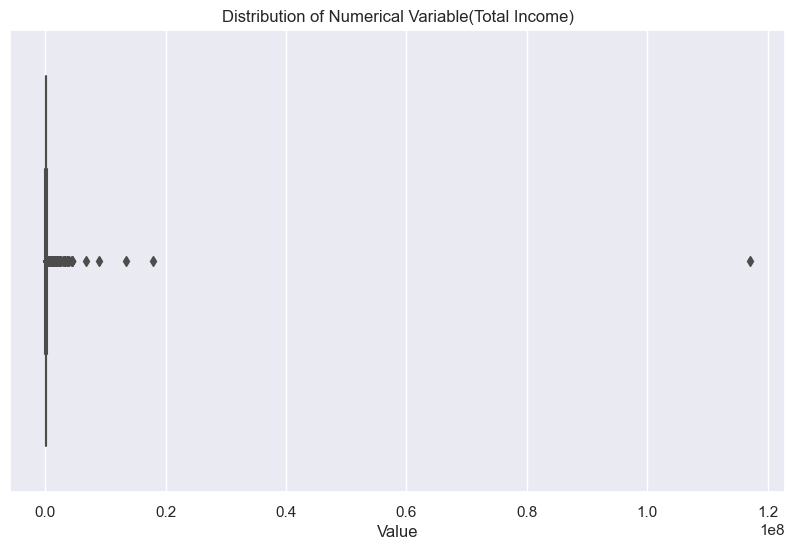

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Train_data['AMT_INCOME_TOTAL'], color='blue')
plt.title('Distribution of Numerical Variable(Total Income)')
plt.xlabel('Value')
plt.show()

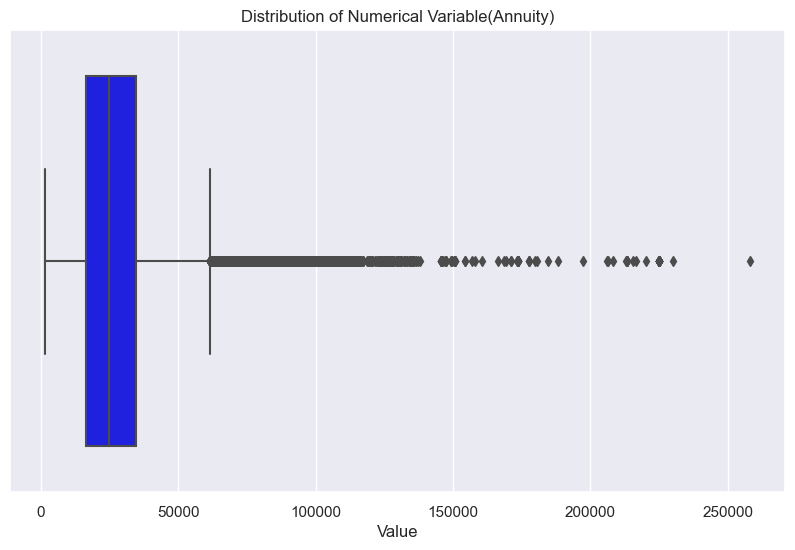

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Train_data['AMT_ANNUITY'], color='blue')
plt.title('Distribution of Numerical Variable(Annuity)')
plt.xlabel('Value')
plt.show()

In [20]:
# Display summary statistics for numerical columns
summary_stats_numeric = Train_data.describe()

# Display summary statistics for categorical columns
summary_stats_categorical = Train_data.describe(include=['object'])

# Display summary statistics for all columns
summary_stats_all = Train_data.describe(include='all')

print("Summary Statistics for Numerical Columns:")
print(summary_stats_numeric)




Summary Statistics for Numerical Columns:
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000

In [21]:
print("\nSummary Statistics for Categorical Columns:")
print(summary_stats_categorical)



Summary Statistics for Categorical Columns:
       NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartm


Summary Statistics for All Columns:
           SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  3